Perceptron: Score

In [ ]:
# evaluate a perceptron model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean Accuracy: 0.847 (0.052)


Perceptron: Prediction

In [ ]:
# make a prediction with a perceptron model on the dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron()
# fit model
model.fit(X, y)
# define new data
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat)

Predicted Class: 1


Perceptron: Grid Search

In [ ]:
# grid search total epochs for the perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron(eta0=0.0001)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.857
Config: {'max_iter': 10}
>0.850 with: {'max_iter': 1}
>0.857 with: {'max_iter': 10}
>0.857 with: {'max_iter': 100}
>0.857 with: {'max_iter': 1000}
>0.857 with: {'max_iter': 10000}


# **Perceptron code simulation**
Refer to: https://mashimo.wordpress.com/2015/06/06/perceptron-an-artificial-neuron/

# **Boolean Activation**

In [ ]:
import numpy as np  # for matrix multiplication

def booleanActivation(input, weights):
    # input and weights are arrays of values
    input = [1] + input  # add bias input
    z = np.dot(input, weights).sum()  # h_w(x)

    if z > 0:
        return 1
    else:
        return 0

# **Forward Not**

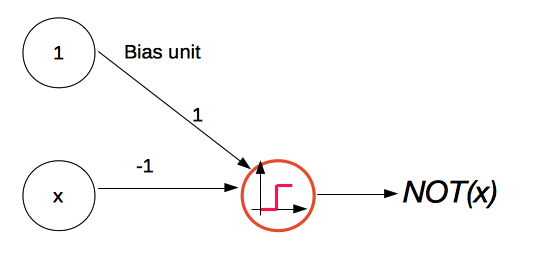

In [ ]:
def forwardNOT(operand):
    NOTweights = [1, -1] # include weight for the bias unit
    return booleanActivation(operand, NOTweights)

In [ ]:
print("*** Simulation of NOT neuron ***")
print("X | Y = NOT X")
print("-------------")
for x in (0,1):
    print(x," | ", forwardNOT([x]))

*** Simulation of NOT neuron ***
X | Y = NOT X
-------------
0  |  1
1  |  0


# **Forward OR**

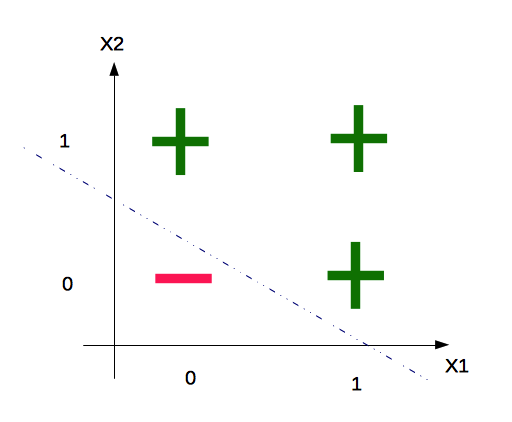

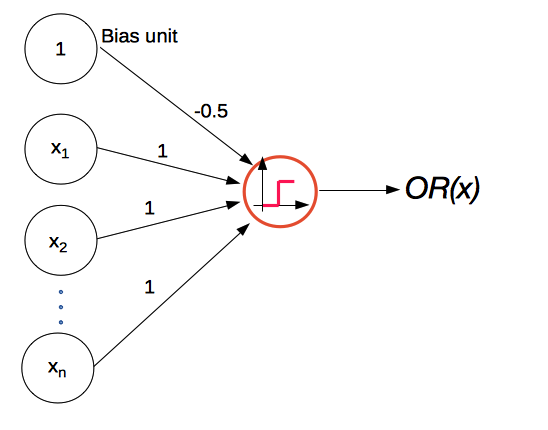

In [ ]:
def forwardOR(operands):
    m = len(operands) # number of inputs
    ORweights = [-0.5] + [1]*m  # hard-coded
    #print (ORweights)
    return booleanActivation(operands, ORweights)

In [ ]:
 print("*** Simulation of OR neuron ***")
 print("X1 | X2 | Y = X1 OR X2")
 print("-----------------------")
 for x1 in (0,1):
     for x2 in (0,1):
         print(x1," | ",x2, " | ", forwardOR([x1,x2]))

*** Simulation of OR neuron ***
X1 | X2 | Y = X1 OR X2
-----------------------
0  |  0  |  0
0  |  1  |  1
1  |  0  |  1
1  |  1  |  1


# **Forward AND**

In [ ]:
def forwardAND(operands):
    m = len(operands) # number of inputs
    ANDweights = [-1.5] + [1]*m  # hard-coded

    return booleanActivation(operands, ANDweights)

In [ ]:
print("*** Simulation of AND neuron ***")
print("X1 | X2 | Y = X1 AND X2")
print("-----------------------")
inputs = ((x1,x2) for x1 in (0,1) for x2 in (0,1))
for x1,x2 in inputs:
    print (x1," | ",x2, " | ", forwardAND([x1,x2]))

*** Simulation of AND neuron ***
X1 | X2 | Y = X1 AND X2
-----------------------
0  |  0  |  0
0  |  1  |  0
1  |  0  |  0
1  |  1  |  1


# **Forward XOR**

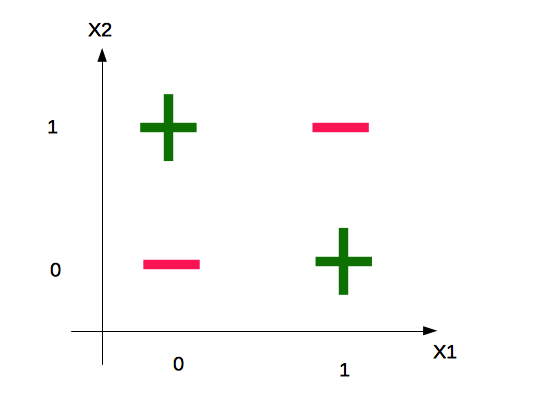

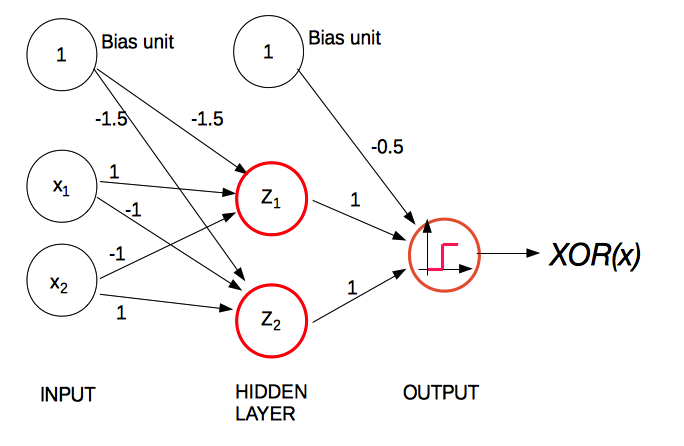

In [ ]:
def forwardXOR(x1,x2):
  # this is a network combining existing neurons, 
  # no weights to prepare
  x1not = forwardNOT([x1])
  x2not = forwardNOT([x2])
  z1 = forwardAND([x1, x2not])
  z2 = forwardAND([x1not, x2])

  return forwardOR([z1,z2])

In [ ]:
print("*** Simulation of XOR network of neurons ***")
print("X1 | X2 | Y = X1 XOR X2")
print("------------------------")
for x1 in (0,1):
  for x2 in (0,1):
    print(x1," | ",x2, " | ", forwardXOR(x1,x2))

*** Simulation of XOR network of neurons ***
X1 | X2 | Y = X1 XOR X2
------------------------
0  |  0  |  0
0  |  1  |  1
1  |  0  |  1
1  |  1  |  0
